name: Marco Giunta

# Exercise 1: expectation and variance for an empirically measured probability distribution
The first thing we need to do is to import the 3 data vectors; then we can use the definitions of exp. value and variance to compute our targets.

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
prob.df <- data.frame(x, p1, p2)
prob.df

x,p1,p2
<dbl>,<dbl>,<dbl>
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


Now we can use the following formulae (which are *definitions* of these two quantities); given a discrete random variable $X$ with $k\leq +\infty$ possible values (each with its own probability $p_i$ of happening, i.e. that $X = x_i$) it holds that
\begin{equation}
\mathbb{E}(X) = \sum_{i=1}^k x_i p_i = p_1 x_1 + \dots + p_k x_k
\end{equation}
and that
\begin{equation}
\mathrm{Var}(X) = \mathbb{E}(X^2)-\left(\mathbb{E}(X)\right)^2 = \sum_{i=1}^k p_i x_i^2 - \left(\sum_{i=1}^k x_i p_i\right)^2 = \sum_{i=1}^k p_i x_i^2 - \mu^2
\end{equation}
These two quantities are readily computed using vectorized operation; in particular it suffices to compute the elementwise product of the `x` and `x^2` vectors with the `p1` and `p2` vectors.

In [16]:
E1 <- sum(x*p1) #this is a simple way to get our exp. value. We notice that E(X) is just the linear combination obtained by summing over the elementwise prod. of x and p1
#E1 <- (x %*% p1)[1] #an alternative approach is to use the dot product, since E(X) can actually be interpreted as <x,p1>
print(sprintf("Exp. value according to p1: %f", E1))

E2 <- sum(x*p2) #(x %*% p1)[1]
print(sprintf("Exp. value according to p2: %f", E2))

E12 <- sum(x^2*p1) - E1
E22 <- sum(x^2*p2) - E2

print(sprintf("Variance according to p1: %f",E12))
print(sprintf("Variance according to p2: %f",E22))

#we notice that the 2 distributions yield almost identical values for both E(X) and Var(X)

[1] "Exp. value according to p1: 15.959000"
[1] "Exp. value according to p2: 15.962200"
[1] "Variance according to p1: 238.764660"
[1] "Variance according to p2: 238.857796"


# Exercise 2: waiting time at the doctor's

# Exercise 3: typos in a book
The description of the problem suggests to consider our random variable (number of mistakes in a book) to be a Poisson random variable with $\lambda = 1 \ \text{mistake} \ / \ 3 \ \ \text{pages}$ i.e. $\lambda = 1/3$; this is enough information to plot the pdf and cdf (via the `dpois` and `ppois` functions, respectively) and the probability of having $\geq 1$ errors in any given page (via `ppois once again`).

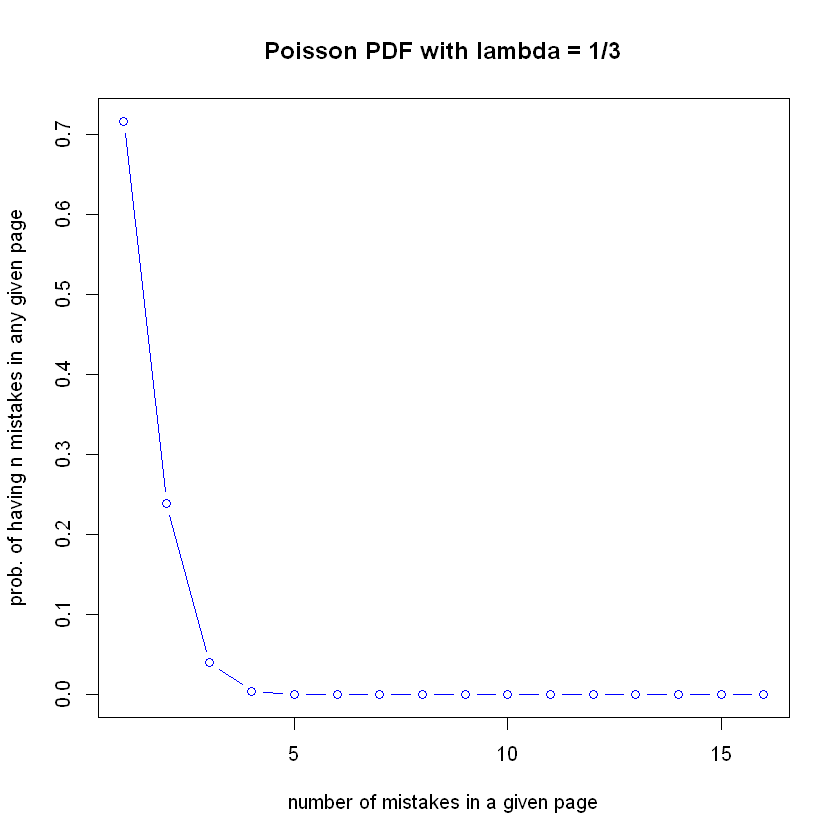

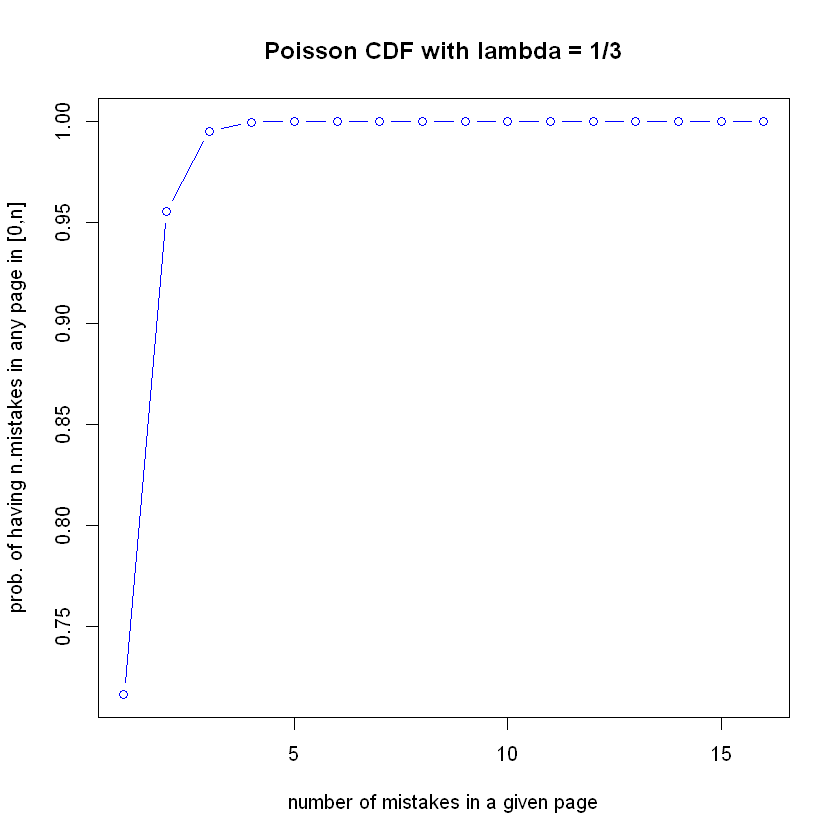

In [38]:
n <- 0:15 #since this is a discrete distribution the input of the following functions must be an integer vector; integers from 0 to 15 suffice to create a simple plot.
plot(dpois(n, lambda = 1/3), type = "b", col = "blue", main = "Poisson PDF with lambda = 1/3", xlab =  "number of mistakes in a given page", ylab = "prob. of having n mistakes in any given page")
plot(ppois(n, lambda = 1/3), type = "b", col = "blue", main = "Poisson CDF with lambda = 1/3", xlab =  "number of mistakes in a given page", ylab = "prob. of having n.mistakes in any page in [0,n]") #i.e. between 0 and n
#since we set lower.tail = T (default value)

To compute the probability of having at least 1 error in any given page we can proceed in at least two different but equivalent ways:
- we can sum the probabilities of having $n=1$, $n=2$, $n=3$, ... which is the discrete equivalent to the integral we perform to obtain the CDF of a continuous distribution.
- we can set this probability equal to 1 - the probability of having less than 1 error (which is simply the probability of having $n=0$).
Both of these can be performed with the `ppois` function (we only need to adjust the `lower.tail` argument).

In [45]:
# from the ppois documentation we notice that if lower.tail is set equal to TRUE we obtain the prob. that X <= x; if it's set to FALSE we obtain the prob. that X > x. Due to this convention we need to do the following:
# - the prob. that X < 1 is equal to the prob. that X <= 0 (lower.tail = TRUE with x = 0)
# the prob. that X >= 1 is equivalent to the prob. that X > 0 (lower.tail = FALSE with x = 0)
# This means we need to feed 0 (not 1) as input to ppois

print(sprintf("Prob. of having at least 1 mistake (direct computation): %f", ppois(0, lambda = 1/3, lower.tail = FALSE)))
print(sprintf("Prob. of having at least 1 mistake (1 - conj. prob.): %f", 1 - ppois(0, lambda = 1/3, lower.tail = TRUE)))
#the results agree as expected.

[1] "Prob. of having at least 1 mistake (direct computation): 0.283469"
[1] "Prob. of having at least 1 mistake (1 - conj. prob.): 0.283469"


# Exercise 4: playing with a deck of cards

# Exercise 5: time to complete the exam
As the problem tells us if $t$ is the time in hours needed to complete the TOLC-I exam then $t$ is a random variable obeying the distribution

\begin{equation}
f(t) = \left\{ 
    \begin{array}
        \ c(t-1)(2-t) \quad 1 < t < 2 \\ 0 \quad \text{otherwise}
    \end{array}
\right.
\end{equation}

## 5.1: determination of the normalization constant $c=1$
In order for $f(t)$ to be an actual pdf it needs to be normalized, i.e. it must hold that
\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t = 1
\end{equation}
This integral is quite easy to evaluate exactly, since $f$ is equal to 0 for most of the time.
\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t = \int_{-\infty}^{1} f(t) \ \mathrm{d} t + \int_{1}^{2} f(t) \ \mathrm{d} t + \int_{2}^{+\infty} f(t) \ \mathrm{d} t =
\underbrace{\int_{-\infty}^{1} 0 \ \mathrm{d} t}_{= \ 0} + \int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t + \underbrace{\int_{2}^{+\infty} 0 \ \mathrm{d} t}_{= \ 0} = \int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t
\end{equation}
We obtain:
\begin{equation}
\int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t = c \left[-\frac{t^3}{3} + \frac{3t^2}{2} -2t \right]_1^2 = \dots = c\frac{1}{6}
\end{equation}
This equals 1 iff $c=6$, which is our exact result; we can confirm this is correct via numerical integration as follows.

In [56]:
f <- function(t) {ifelse((t > 1 & t < 2), (t-1)*(2-t), 0)}
integral.value <- integrate(f, 1, 2)$value
integral.error <- integrate(f, 1, 2)$abs.error
print(sprintf("The numerical integral of f/c between 1 and 2 is: %f with absolute error < %f",integral.value, integral.error))
print(sprintf("This means that numerically c is %f", 1/integral.value))
#print(integrate(f, 1, 2))

[1] "The numerical integral of f/c between 1 and 2 is: 0.166667 with absolute error < 0.000000"
[1] "This means that numerically c is 6.000000"


## 5.2: functions definitions and plots

To write the four functions for the `examtime` distribution we consider what follows.
- PDF: we already know that our random variable $t$ follows the distribution $f(t)$, therefore to define `dexamtime` it suffices to implement $f$.
- CDF: by definition the cdf is the integral of the pdf - which we already computed analytically; if we properly fix the integration bounds we once again only have to implement a simple function defined by cases (we can also do this numerically, which is a bit easier).
- quantile function: we can invert the cdf where it is strictly increasing; see the code cell for more details.
- random variable sampling function: since we have an exact formula for the inverse cdf we can easily sample from $f(t)$ by "recycling" a uniform distribution random number generator; see the code cell for more details.

In [101]:
#note: in each of these functions we will add the same arguments that can be found in, say, dnorm etc. (therefore we will need logical variables log, lower.tail and log.p)

dexamtime <- function(t, log = FALSE) {
    y <- ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0) #we set c=6 because we know this to be the exact normalization constant.
    if (log) {return(log(y))}
    else {return(y)}
}

#dexamtime(1.5)

# if (...) is not vectorized in R, but ifelse is. In order to explain what is going on I first defined a p... function which is to be used with scalars only for clarity's sake; 
# after this is done I properly vectorize it by replacing if(...) with ifelse(...), which *is* vectorized.
pexamtime.scalar <- function(t, lower.tail = TRUE, log.p = FALSE) {
    #let's distinguish 3 cases when lower.tail equals its default TRUE value i.e. when cdf(t) = \int_{-\infty}^t f(t') dt' .
    #1) if t<=1 f is zero inside the integration interval and so is its integral:
    if (t <= 1) {y <- 0}
    
    #2) if 1<t<2 then we only need to consider the integral of f between 1 and t (since f is zero for t <= 1), which (since c=6) is equal to the following function (as can be easily shown):
    if (t > 1 & t < 2) {y <- 6*(-t^3/3 + 3*t^2/2 - 2*t) + 5} #numerical alternative: see below    
    
    #3) if t >= 2 then we are considering the whole support of f, therefore our cdf equals the integral between +- infinity - but since f has been normalized this is trivially 1.
    if (t >= 2) {y <- 1}
    
    # now we consider that if lower.tail is FALSE then the integral is not from - infinity to t but from t to + infinity. This seems a bit problematic because it seems to imply we have to re-define by cases our cdf,
    # but things need not be this complicated; it suffices to consider that P(T > t) = 1 - P(T <= t) because the two events T <= t and T > t encompass every possible event (and therefore the sum of their probabilities must be 1).
    # This means we can avoid the computation of a different integral, because the result will be 1 - y (this can be formally proved with the property that integrals are linear wrt the integration interval).
    if (lower.tail == FALSE) {y <- (1 - y)}
    
    # finally we observe that if log.p is TRUE we need to return the logarithm of y instead of y itself.
    if (log.p) {y <- log(y)}
    
    return(y)
}

# to obtain a properly vectorized version of the above function we only need to replace if(condition) {y <- value} with y <- ifelse(condition, value). This will make the function harder to read, though, 
# since the fact that we need to consider 3 cases makes it so that we have to nest multiple calls to ifelse.

pexamtime <- function(t, lower.tail = TRUE, log.p = FALSE) {
    # notice that if the first two checks fail then it's automatically true that t is in ]1,2[ and hence there's no need to check it --> we can omit a third ifelse.
    y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, 6*(-t^3/3 + 3*t^2/2 - 2*t) + 5))
    
    if (lower.tail == FALSE) {y <- (1 - y)}
    
    # finally we observe that if log.p is TRUE we need to return the logarithm of y instead of y itself.
    if (log.p) {y <- log(y)}
    
    return(y)
}

# numerical alternative:
pexamtime.numerical <- function(t) {
    # this time we numerically compute our integral, which has nontrivial values only in ]1,2[
    f <- function(t) {ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0)}
    y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, ifelse(TRUE, integrate(f, 1, t)$value, NA)))
    
    if (lower.tail == FALSE) {y <- 1 - y}
    if (log.p) {y <- log(y)}
    return(y)    
}

Before defining the remaining two functions it's useful to plot the pdf and cdf - which we can actually do now, since we just defined them.

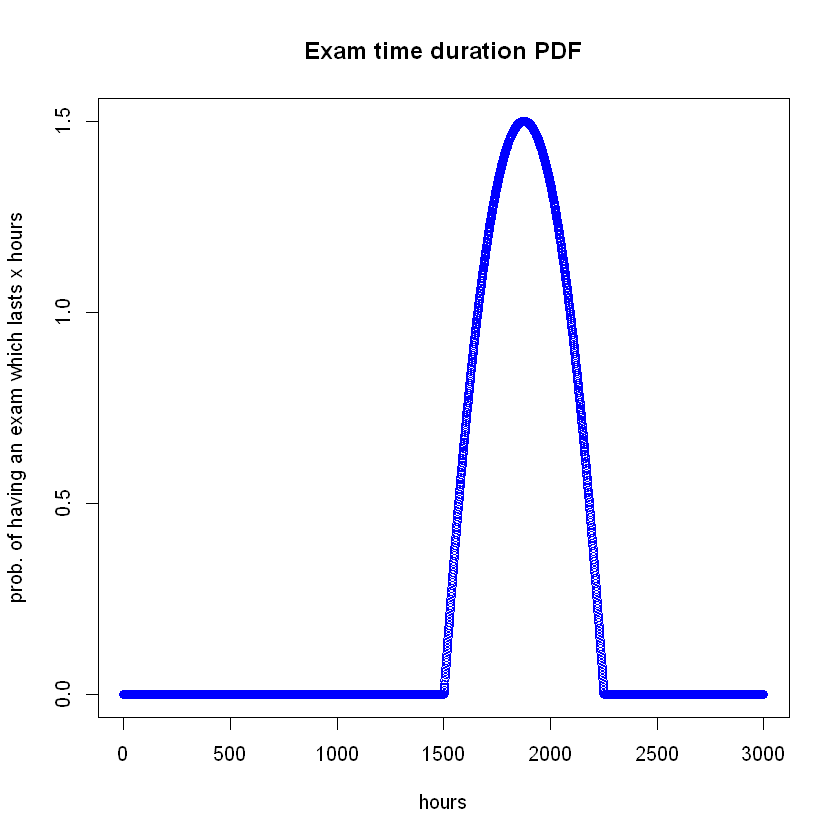

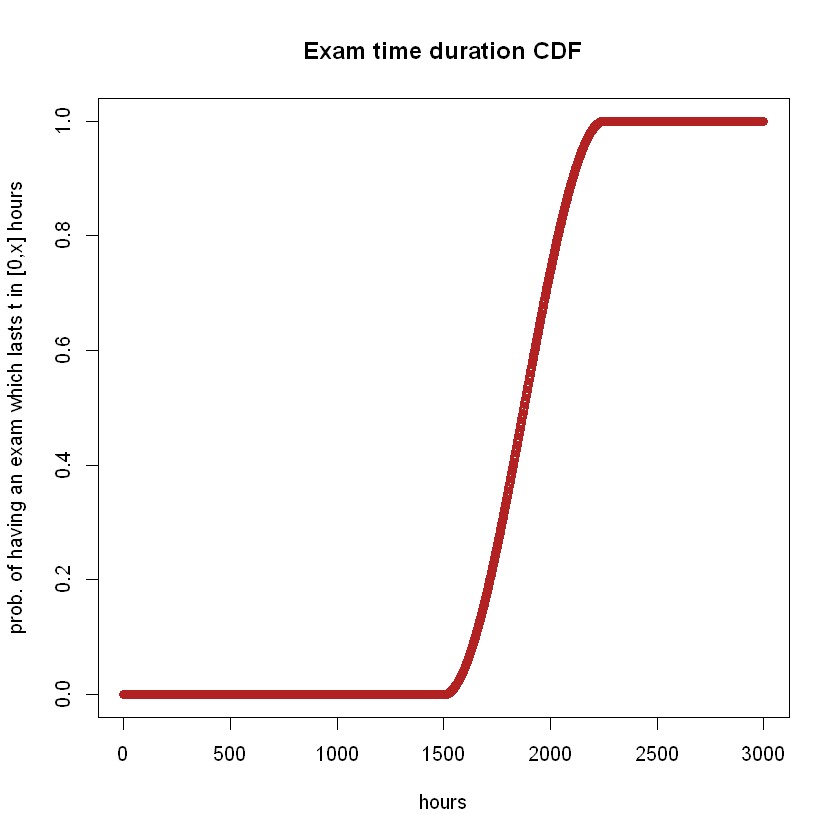

In [102]:
x <- seq(from = -1, to = 3, length.out = 3000) #alternatively I can specify by = 0.001 or some similar value
plot(dexamtime(x), type = "b", col = "blue", main = "Exam time duration PDF", xlab =  "hours", ylab = "prob. of having an exam which lasts x hours") #c(x[1],x[length(x)])
plot(pexamtime(x), type = "b", col = "firebrick", main = "Exam time duration CDF", xlab =  "hours", ylab = "prob. of having an exam which lasts t in [0,x] hours")

In [106]:
# before proceeding we check whether the 3 functions above are actually equivalent in the following way: we compute F(x) for a vector x with those 3 different functions and then compare the results with v1 == v2. 
# If every element of the resulting logical vector is true then it means the functions return the same result
N <- 3000
x <- seq(from = -1, to = 3, length.out = N)
#the first function is not vectorized and hence a for loop is unavoidable
a <- rep(0, N)
for (i in 1:3000){
    a[i] <- pexamtime.scalar(x[i])
}
b <- pexamtime(x)
c <- pexamtime(x)

if (sum(a == b) == N) {print("The scalar and vectorized exact functions are equivalent")}
if (sum(c == b) == N) {print("The vectorized exact and numerical functions are equivalent")} #it's risky to use == with floats, but in this case the result is so close it works just fine

[1] "The scalar and vectorized exact functions are equivalent"
[1] "The vectorized exact and numerical functions are equivalent"


Having plotted the CDF we are reminded that it's constant for $t\leq 1$ and $t\geq 2$, but we also notice a new fact: namely, the cdf is stricly monotonically increasing in $]1,2[$. These results mean that the cdf can be inverted in $]1,2[$, but not elsewhere since there the inverse would be undefined; indeed, there are infinite values of $t$ that make the cdf equal 0 or 1.

In [ ]:
qexamtime <- function(y, lower.tail = TRUE, log.p = FALSE) {
    # by definition the quantile function Q(y) associated to the cdf F(x) returns the particular value of x such that F(x)=y. If F is a stricly monotonically increasing function then it holds that Q = F^-1;
    # how does all of this relate to our problem? We notice that in ]1,2[ F satisfies this property and is therefore invertible without issues; outside of this interval F^-1 is undefined because it would map a single 
    # number to infinite values (violating the very definition of what a function is). This means that we can implement the inverse cdf as undefined i.e. equal to NA outside that interval, and equal to the inverse function
    # inside of it.
    
}

In [57]:
?pnorm

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x] otherwise, P[X > x]."


## 5.3: computation of some probabilities

# Exercise 6: lifetime of a tire